In [2]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [48]:
"""1 e"""

pc = 2500
Fao = 1000
R = 3e-3
De= 1.5e-8
ki = 3.93863e-7
am = 0.4


def func(X):
    kc,n,Cas = X
    O = R*((ki*2500*Cas)/De)**0.5
    eqn1 = ((2/3)**(0.5))*3/O - Fao*0.15/((Cas**2)*40*ki)
    eqn2 = 5*0.15/40/(am*(850 - Cas)) - kc
    eqn3 = n - ((2/3)**(0.5))*3/O
 
    return eqn1,eqn2,eqn3

Ki = fsolve(func,[1.93e-4,25.8303789,.12435233])
   
print ((Ki))
print (func([1.93e-4,25.8303789,607.12435233]))

[ -2.35627606e-06   2.21265911e-02   2.07436792e+04]
(-25.70104315469281, -1.2764312176671844e-15, 25.701043152690637)


In [49]:

pc = 2500
Fao = 1000
R = 3e-3
De= 1.5e-8
ki = 3.93863e-7
am = 0.4


def func(Cas):
    eqn1 = 5*0.15/40 -((2/3)**(0.5))*3*De**0.5/(R*(ki*pc*Cas)**0.5)*ki*Cas**2
    return eqn1

Ki = fsolve(func,[600.12435233])
   
print ((Ki))

[ 606.54885805]


In [111]:

Q = 1.4/1000/60
Hrxn = -50000
Cpa = 250
pc = 1800
Fao = 2000*Q
Cao = 2000
ki = 0.1**2*1e-8/1800/((0.5e-3)**2)
T = -45000/8.314/np.log(ki/2)
def bala(para):
    x,W = para
    eqn1 = np.log(1-x) +  ki*W/Q
    eqn2 = 536237375 + (1-x)*Hrxn*W/(Q*Cpa)
    return eqn1,eqn2

x,W = fsolve(bala,[0.25,67])
print (x,W)

0.25 67.0


C:\Users\reube\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in log
C:\Users\reube\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


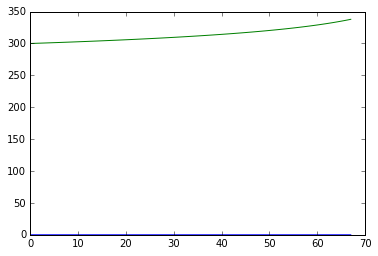

0.18949545193793976

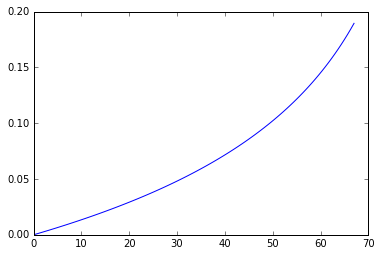

In [7]:
Q = 1.4/1000/60
Hrxn = -50000
Cpa = 250
pc = 1800
Fao = 2000*Q

def dndt(para,w):
    Fa,T = para
    ki = 2*np.exp(-45000/(8.314*T))
    dFadw = -ki*Fa/Q
    dTdW = (-ki*Fa/Q)*Hrxn/(Fao*Cpa)
    return dFadw,dTdW

wspan = np.linspace(0,67,101)
Ans = odeint(dndt,[Fao,300],wspan)
plt.plot(wspan,Ans)
plt.show()
plt.plot(wspan,(Fao - Ans[:,0])/Fao)
Ans[:,1]
x = (Fao - Ans[:,0])/Fao
x[-1]

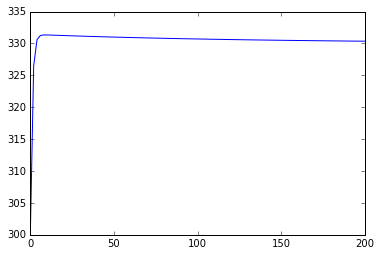

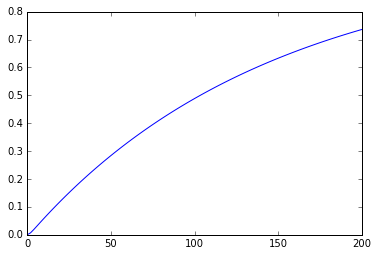

0.0457260127681 331.340149478


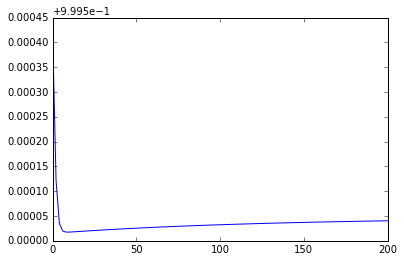

In [8]:
Q = 1.4/1000/60
Hrxn = -50000
Cpa = 250
pc = 1800
Fao = 2000*Q
pbed = 800
Ua = 9.1e3
Tu = 330
def dndt(para,w):
    x,T = para
    ki = 2*np.exp(-45000/(8.314*T))
    O = (ki*pc*((0.5e-3)**2)/1e-8)**0.5
    n = (3/O**2)*(O/np.tanh(O) - 1)
    dxdw = n*ki*(1-x)/Q
    dTdW = (Ua/pbed*(Tu - T) - (n*ki*Fao*(1-x)/Q)*Hrxn)/(Fao*Cpa)
    return dxdw,dTdW

wspan = np.linspace(0,200,101)
Ans = odeint(dndt,[0,300],wspan)
X = Ans[:,0]
T = Ans[:,1]
plt.plot(wspan,T)
plt.show()
plt.plot(wspan,X)
ki = 2*np.exp(-45000/(8.314*T))
O = (ki*pc*(0.5e-3)**2/1e-8)**0.5
n = 3/O**2*(O/np.tanh(O) - 1)
plt.show()
plt.plot(wspan,n)
max = np.argmax(T)
print (X[max],T[max])


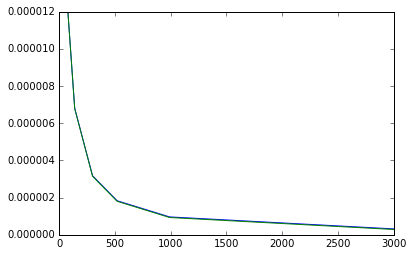

In [7]:
"""5 d"""
pc = 1200
W = 5E-3
D = np.array([3000,990,520,300,140,80])
X =np.array([0.529,0.605,0.627,0.637,0.645,0.648])

# plt.plot(D,X)
am = 6/(D*pc)
Ccat = 1
FAo = 10
ki = 2.9054e-4
O = (ki*pc*(D/2)**2/7E-8)
n = 3/(O**2)*(O/np.tanh(O) - 1)
CAo = 6/1e-3
CAb = CAo*(1-X)
CAs = (FAo*X/(ki*n*W))**0.5

ra = -FAo*X/W
kc = ra/((CAb - CAs))
KC = kc[5]*D[5]/D
plt.plot(D,KC)
plt.plot(D,kc)
plt.show()

In [ ]:
"""5 d"""
pc = 1200
D = np.array([3000,990,520,300,140,80])
X =np.array([0.529,0.605,0.627,0.637,0.645,0.648])

# plt.plot(D,X)
am = 6/(D*pc)
Ccat = 1
FAo = 10
ki = 2.9054e-4
O = (ki*pc*(D/2)**2/7E-8)
n = 3/(O**2)*(O/np.tanh(O) - 1)
CAo = 6/1e-3
CAb = CAo*(1-X)
CAs = (FAo*X/(n*ki*W))**0.5
W = 5E-3
ra = -FAo*X/W
kc = ra/((CAb - CAs))
KC = kc[5]*D[5]/D
plt.plot(D,KC)
plt.plot(D,kc)
plt.show()